In [70]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

<h2>A hack to make our implicit equation to explicit form</h2>

In [71]:
def getI(V, Rs, Rsh, Isat, Iph, eta):
    """
    This function will generate cuurent for given voltage given 5 diode parameters    
    """
    kb = 1.38*10**(-23) #Boltzmann constant
        
    Temp = 25
    kb = 1.38*10**(-23) #Boltzmann constant
    q = 1.6*10**(-19)
    Vt = kb*(Temp+273)/q
    Ncell = 72
    
    I_implicit_equn = lambda i: -i + Iph - Isat*(np.exp((v+i*Rs) / (eta*Ncell*Vt))-1) - (v+i*Rs)/Rsh
    I=[]
    
    # If V is not vector, then I should be returned accordingly
    if (type(V)==int or type(V)==float):
        v=V
        i_solution = root(I_implicit_equn,10)
        i = i_solution.x[0]
        return (i)
    
    # If V is a vector, return a vector
    for v in V:
        i_solution = root(I_implicit_equn,10)
        i = i_solution.x[0]
        I.append(i)
    return (np.array(I))

In [72]:
diode_param = (0.3551735739069161, 20051.491203008736, 2.9778179325966427e-10, 9.250163845946686, 1.0266558791833786)
print(getI(40, *diode_param))

7.5488073329862475


<h2>Now generating data that is going to be fitted in the next step</h2>

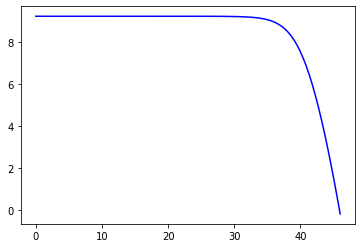

In [73]:
# xdata is V vector from 0 to 46V of size 100
xdata=np.linspace(0,46,100)
#Using getI function to calculate I as ydata
ydata = getI(xdata, *diode_param)
plt.plot(xdata, ydata, 'b-', label='data')

<h2>Now fitting our generated ydata to getI function</h2>

[  1.28079103  43.13711546 -12.36841986  -4.68471043  19.84137814]


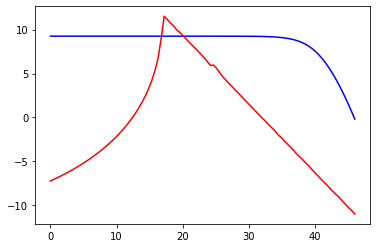

In [74]:
popt, pcov = curve_fit(getI, xdata, ydata)
print (popt) # parameters
plt.plot(xdata, ydata, 'b-', label='data') #Original plot
plt.plot(xdata, getI(xdata, *popt), 'r-')